# Recurrent Neural Network (RNN)

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=LwM7xabuiIc&t=9895s

In [2]:
from IPython.display import Image, display


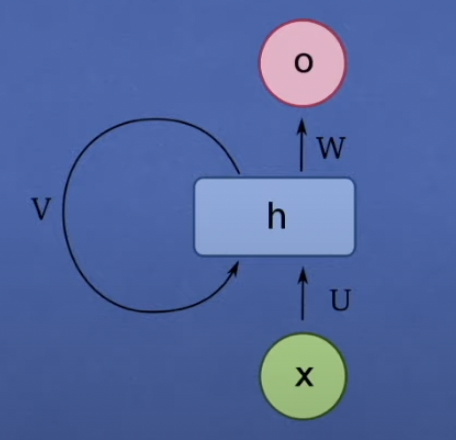

In [3]:

display(Image(filename='images/rnn_1.png', width=300))

Recurrent neural nets (RNNs) are a class of neural networks that allow previous outputs to be used as inputs while having hidden states.

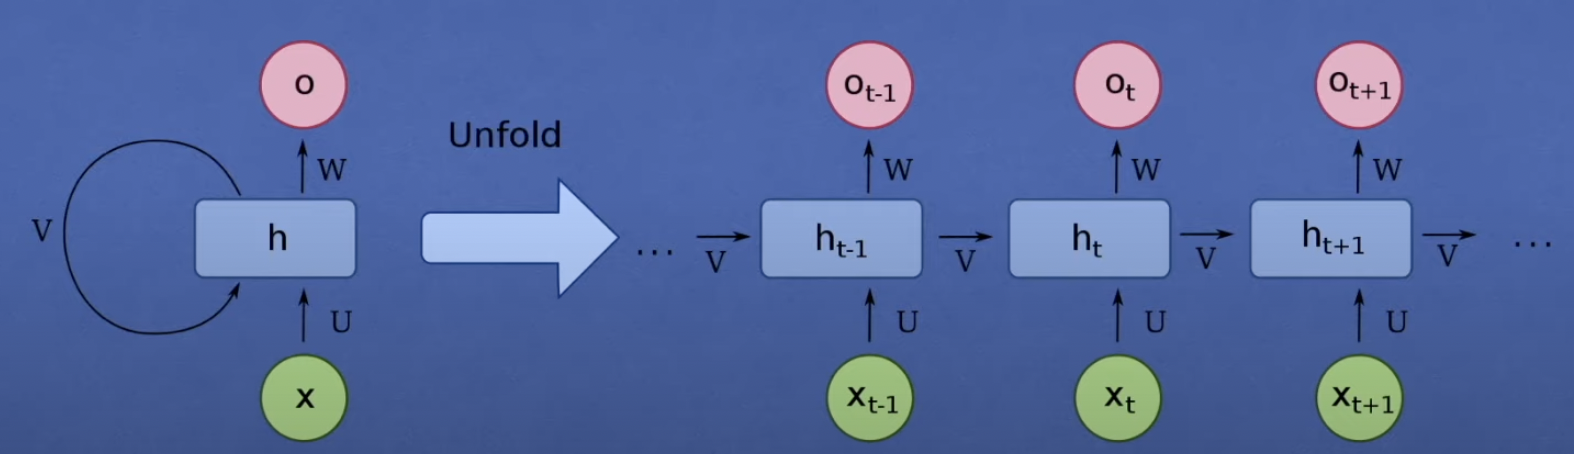

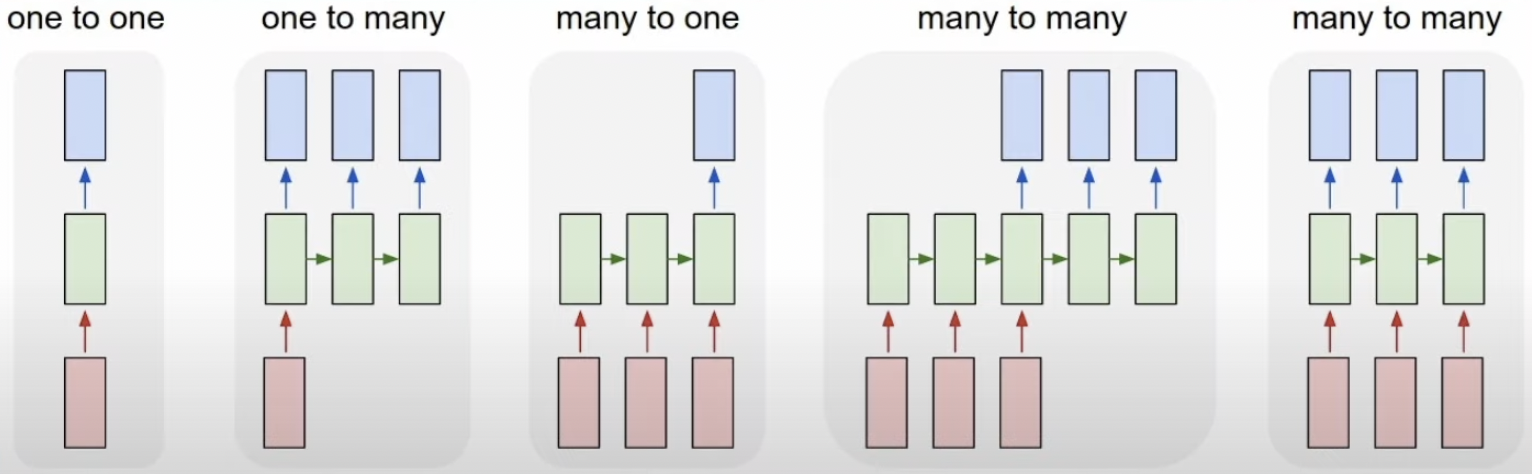

In [8]:

display(Image(filename='images/rnn_2.png', width=800))

display(Image(filename='images/rnn_3.png', width=800))

This means that we are working with a sequence here. This is super powerful and with this we can use RNNs for many different applications like text generation, text translation, sentiment classification and many more.

RNN models are typicaly used when we deal with text classification or text generation. We can also use it for image classification task. When we deal with RNNs then we deal with a sequence. In our case we have to treat our images as a sequence. This means that we treat one row in our picture like one time step.

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
# 28 by 28
# input_size = 28
# seq_length = 28
# model
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28))) # seq_length, input_size
model.add(layers.SimpleRNN(128, activation='relu')) # by default we are using tanh activation function
# output of SimpleRNN is N, 128
#model.add(layers.SimpleRNN(128, return_sequences=True, activation='relu')) -> with return_sequences=True we will get N, 28, 128 shape
model.add(layers.Dense(10))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 128)               20096     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 21386 (83.54 KB)
Trainable params: 21386 (83.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [18]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.legacy.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [19]:
# training
batch_size = 64
epochs = 5

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/5
938/938 - 5s - loss: 0.4629 - accuracy: 0.8485 - 5s/epoch - 5ms/step
Epoch 2/5
938/938 - 5s - loss: 0.1789 - accuracy: 0.9474 - 5s/epoch - 5ms/step
Epoch 3/5
938/938 - 5s - loss: 0.1418 - accuracy: 0.9583 - 5s/epoch - 5ms/step
Epoch 4/5
938/938 - 5s - loss: 0.1303 - accuracy: 0.9625 - 5s/epoch - 5ms/step
Epoch 5/5
938/938 - 5s - loss: 0.1173 - accuracy: 0.9654 - 5s/epoch - 5ms/step


In [20]:
# evaluate
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.1242 - accuracy: 0.9618 - 318ms/epoch - 2ms/step


[0.12422860413789749, 0.9617999792098999]

## Other RNNs

### GRU

In [21]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28)))
model.add(layers.GRU(128, activation='relu'))
model.add(layers.Dense(10))

print(model.summary())

# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.legacy.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

# training
batch_size = 64
epochs = 5

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

# evaluate
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               60672     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 61962 (242.04 KB)
Trainable params: 61962 (242.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
938/938 - 11s - loss: 0.4439 - accuracy: 0.8498 - 11s/epoch - 12ms/step
Epoch 2/5
938/938 - 11s - loss: 0.1174 - accuracy: 0.9639 - 11s/epoch - 11ms/step
Epoch 3/5
938/938 - 11s - loss: 0.0805 - accuracy: 0.9751 - 11s/epoch - 11ms/step
Epoch 4/5
938/938 - 11s - loss: 0.0642 - accuracy: 0.9802 - 11s/epoch - 11ms/step
Epoch 5/5
938/938 - 11s - loss: 0.0508 - accuracy: 0.9839 - 11s/epoch - 11ms/st

[0.062003448605537415, 0.9803000092506409]

### LSTM

In [22]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28)))
model.add(layers.LSTM(128, activation='relu'))
model.add(layers.Dense(10))

print(model.summary())

# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.legacy.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

# training
batch_size = 64
epochs = 5

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

# evaluate
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 81674 (319.04 KB)
Trainable params: 81674 (319.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
938/938 - 12s - loss: 0.5879 - accuracy: 0.8086 - 12s/epoch - 13ms/step
Epoch 2/5
938/938 - 12s - loss: 0.1345 - accuracy: 0.9592 - 12s/epoch - 13ms/step
Epoch 3/5
938/938 - 12s - loss: 0.0954 - accuracy: 0.9710 - 12s/epoch - 13ms/step
Epoch 4/5
938/938 - 12s - loss: 0.0754 - accuracy: 0.9766 - 12s/epoch - 13ms/step
Epoch 5/5
938/938 - 12s - loss: 0.0630 - accuracy: 0.9806 - 12s/epoch - 13ms/st

[0.06742197275161743, 0.9796000123023987]